In [1]:
from database.load_data import load_sql
import pandas as pd

In [2]:
df6 = load_sql("dataset_60s")
df7 = load_sql("dataset_70s")
df8 = load_sql("dataset_80s")
df9 = load_sql("dataset_90s")
df0 = load_sql("dataset_00s")
df1 = load_sql("dataset_10s")

dfs = [df6, df7, df8, df9, df0, df1]
decades = [1960, 1970, 1980, 1990, 2000, 2010]

In [3]:
[df.insert(loc=3, column='decade', value=decade) for df, decade in zip(dfs, decades)]

[None, None, None, None, None, None]

In [4]:
df_merged = pd.concat(dfs, axis=0)
df_merged[:10]

,track,artist,uri,decade,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
index,,,,,,,,,,,,,,,,,,,,
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,1960,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,1960,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0
5,Beat n. 3,Ennio Morricone,spotify:track:32VBSoD2vcoIOiPEvAfFXU,1960,0.697,0.673,0,-10.573,1,0.0266,0.7140,0.919000,0.1220,0.778,112.117,167667,4,65.48604,7,0
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,1960,0.662,0.272,0,-18.883,1,0.0313,0.3600,0.228000,0.0963,0.591,143.507,134360,4,47.82155,7,0
7,Happy Days,Marv Johnson,spotify:track:0ecGwZA1ReAq4Mn3ZInaT4,1960,0.720,0.624,5,-9.086,0,0.0473,0.7950,0.000000,0.4880,0.887,119.999,160040,4,30.42891,8,1
8,Carolina - Remastered 2006,Caetano Veloso,spotify:track:15gNqKkZN9Mq9AvnRqWJKb,1960,0.545,0.220,2,-15.079,0,0.0828,0.5820,0.239000,0.2690,0.386,118.223,158413,4,47.08099,6,0


In [5]:
items=['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
           'instrumentalness', 'liveness', 'valence', 'tempo', 'chorus_hit', 'sections']

c:\users\xgg\pycharmprojects\spotify_analysis\venv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: 'Line2D' object has no property 'inner'

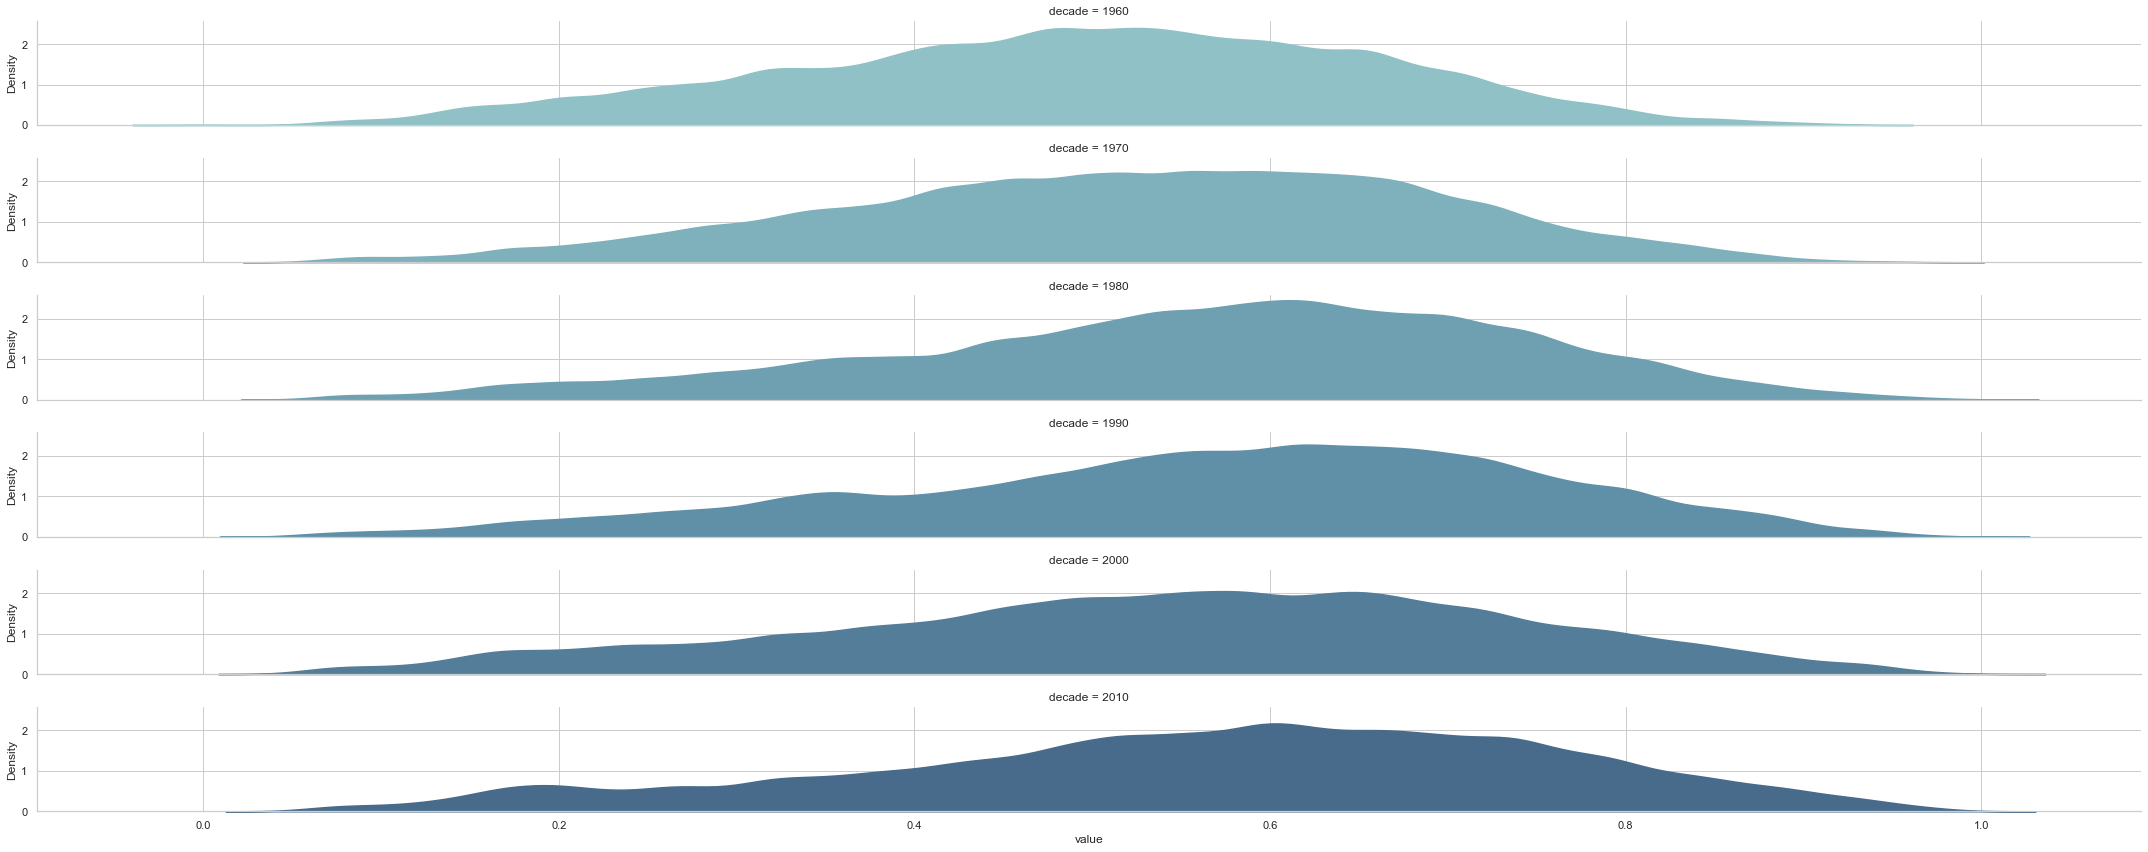

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

df_melted = pd.melt(df_merged, id_vars=['decade'], value_vars=['danceability'])
# f, ax = plt.subplots(figsize=(10,10))
# sns.despine(bottom=True, left=True)

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_melted, row="decade", hue="decade", aspect=15, height=.5, palette=pal, size=2)

g.map(sns.kdeplot, "value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# sns.stripplot(x="value", y="variable", hue="decade",
#               data=df_melted, dodge=True, alpha=.25, zorder=1)

# sns.pointplot(x="value", y="variable", hue="decade",
#               data=df_melted, dodge=.8 - .8 / 3,
#               join=False, palette="dark",
#               markers="d", scale=.75, ci=None)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[3:], labels[3:], title="Decades",
#           handletextpad=0, columnspacing=1,
#           loc="lower right", ncol=3, frameon=True)

plt.show()

c:\users\xgg\pycharmprojects\spotify_analysis\venv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


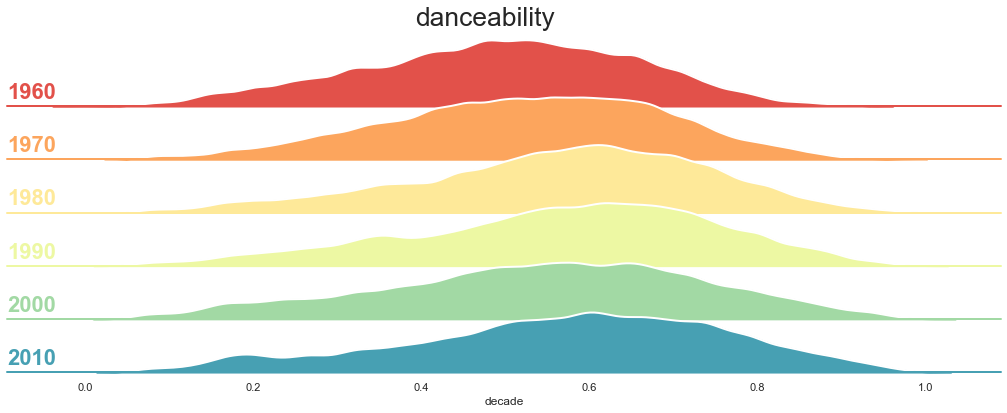

In [88]:
import scipy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
pal = sns.color_palette("Spectral")

for col in items[:1]:
    df_melted = pd.melt(df_merged, id_vars=['decade'], value_vars=[col])

    g = sns.FacetGrid(df_melted, row="decade", hue="decade", aspect=15, height=.5, palette=pal, size=1)

    g.map(sns.kdeplot, "value",
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
    p = g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    #####
    # x,y = p.get_lines()[0].get_data()
    #
    # #care with the order, it is first y
    # #initial fills a 0 so the result has same length than x
    # cdf = scipy.integrate.cumtrapz(y, x, initial=0)
    #
    # nearest_05 = np.abs(cdf-0.5).argmin()
    #
    # x_median = x[nearest_05]
    # y_median = y[nearest_05]
    #
    # # plt.vlines(x_median, 0, y_median)
    #
    # g.map(plt.vlines, x_median, 0, y_median)
    ####

    def label(x, color, label):
        plt.rcParams.update({'font.size': 22})
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, "decade")
    g.figure.subplots_adjust(hspace=-.25)

    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    g.fig.suptitle(col)

    plt.show()


AttributeError: 'AxesSubplot' object has no attribute 'map'

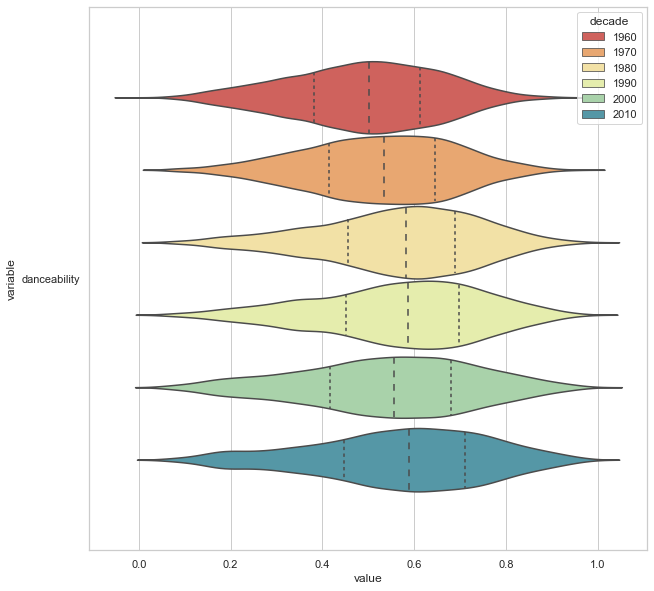

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in items:
    df_melted = pd.melt(df_merged, id_vars=['decade'], value_vars=[col])
    f, ax = plt.subplots(figsize=(10,10))
    g = sns.violinplot(data=df_melted, x="value", y="variable", hue="decade", palette=sns.color_palette("Spectral"), inner="quart", orient="h")

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, "decade")

plt.show()

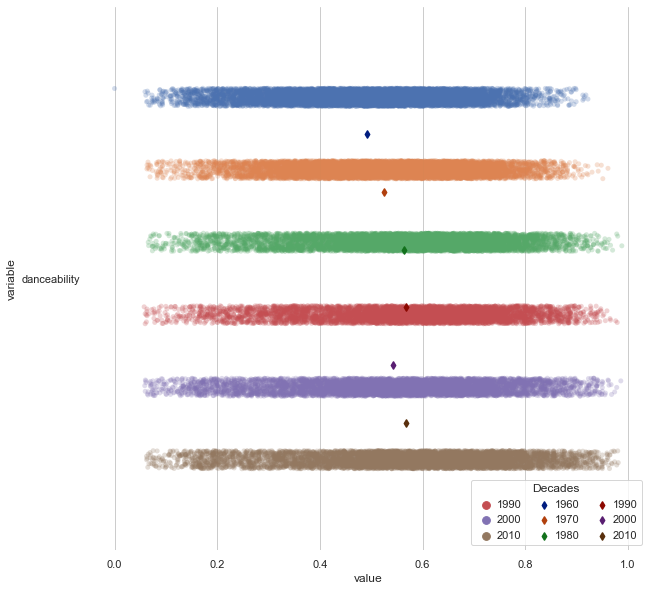

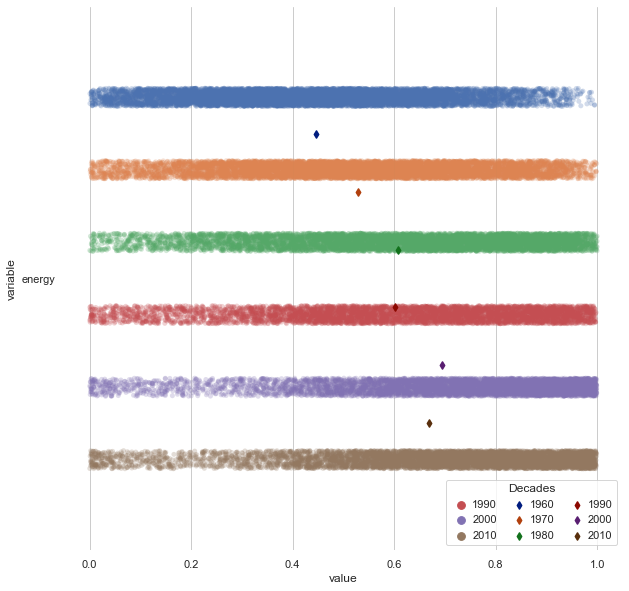

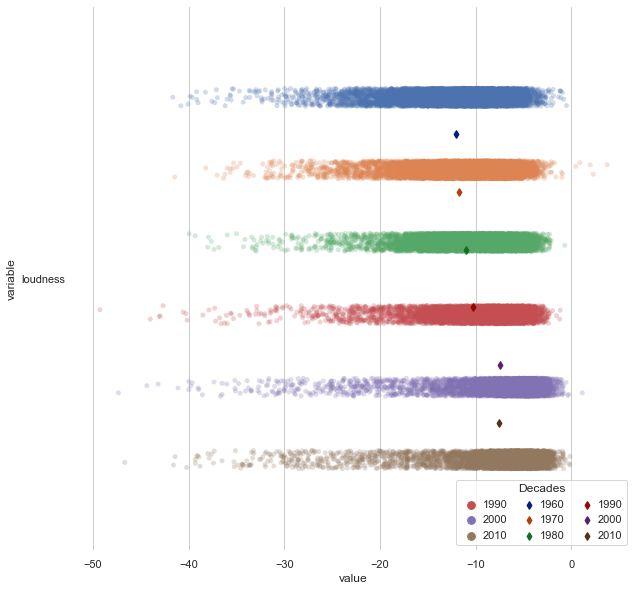

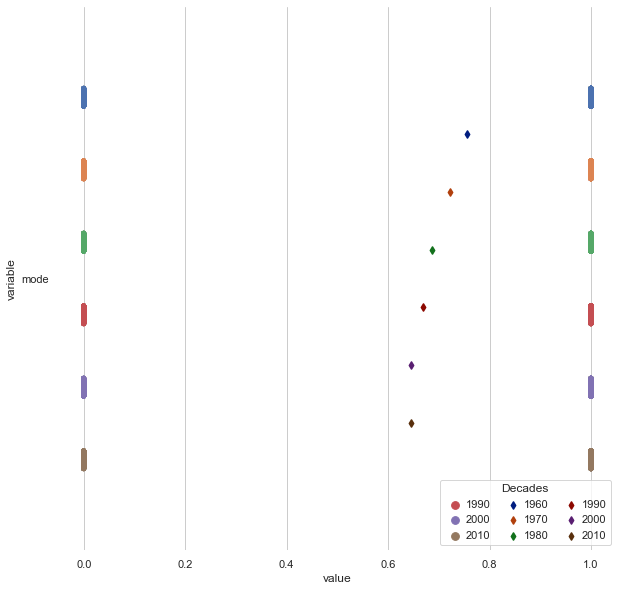

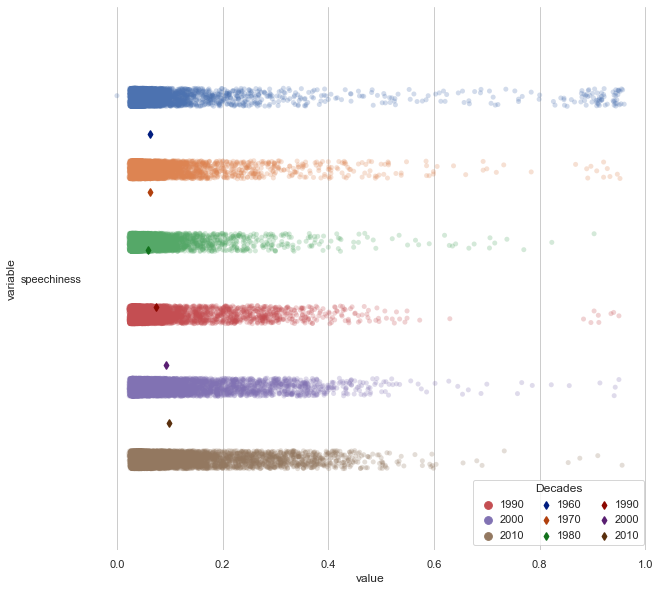

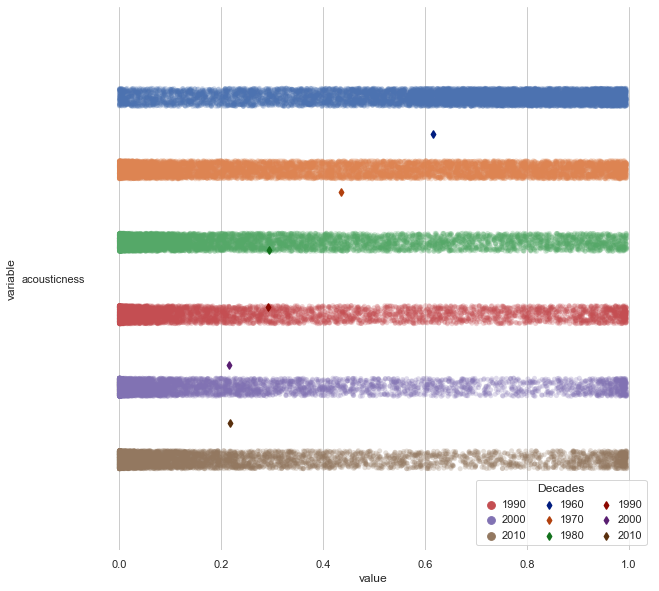

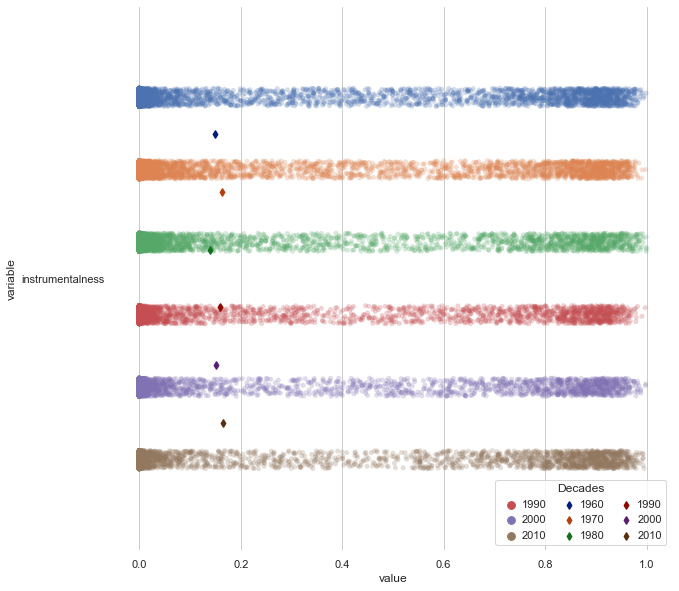

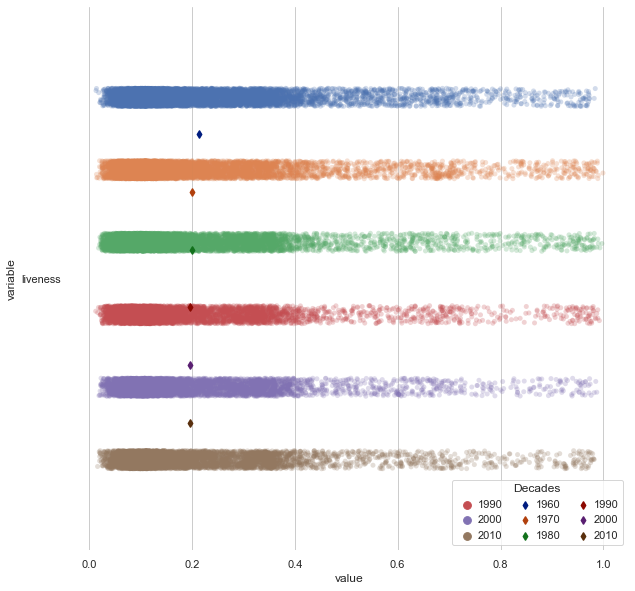

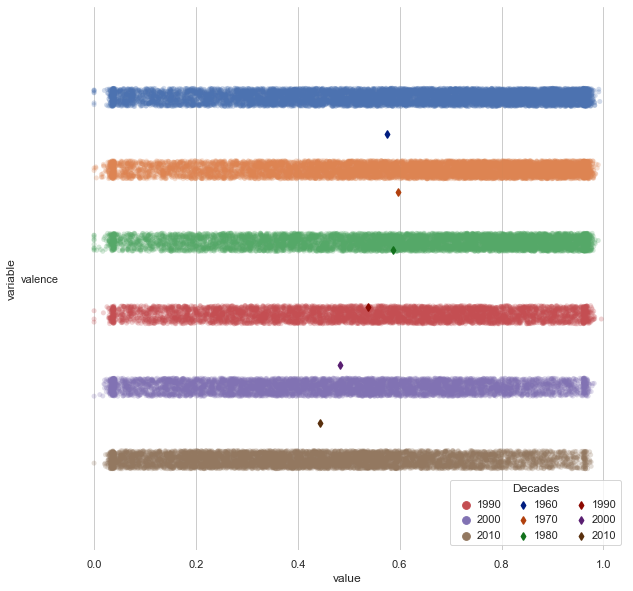

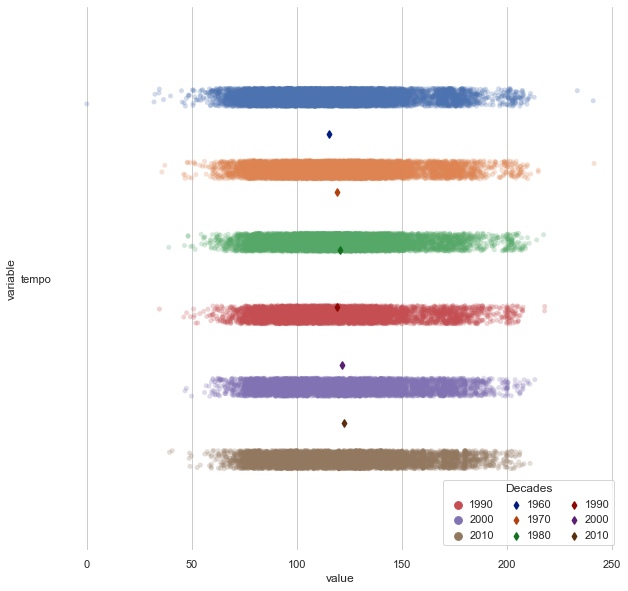

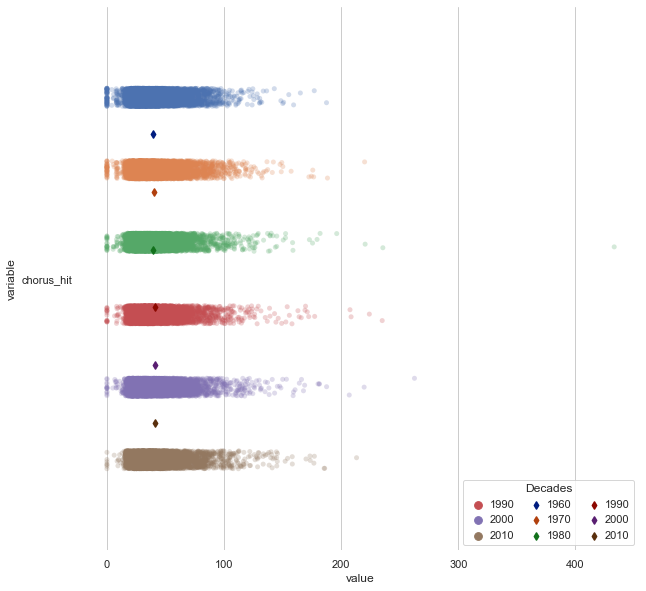

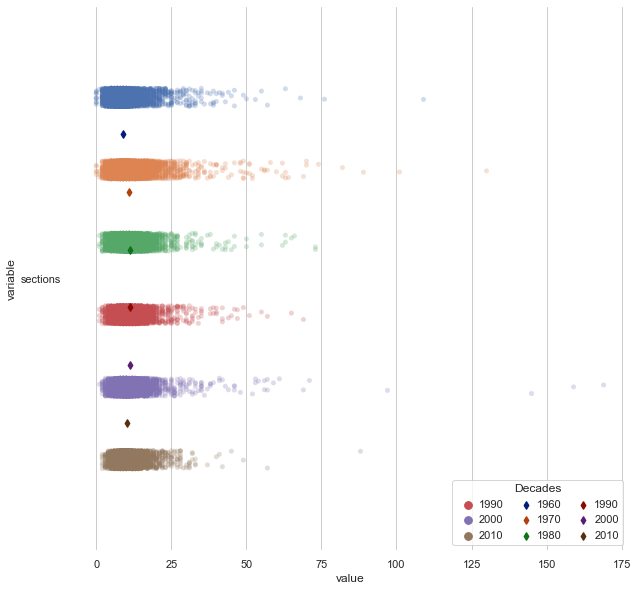

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")


for col in items:
    df_melted = pd.melt(df_merged, id_vars=['decade'], value_vars=[col])
    f, ax = plt.subplots(figsize=(10,10))
    sns.despine(bottom=True, left=True)

    sns.stripplot(x="value", y="variable", hue="decade",
                  data=df_melted, dodge=True, alpha=.25, zorder=1)

    sns.pointplot(x="value", y="variable", hue="decade",
                  data=df_melted, dodge=.8 - .8 / 3,
                  join=False, palette="dark",
                  markers="d", scale=.75, ci=None)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[3:], labels[3:], title="Decades",
              handletextpad=0, columnspacing=1,
              loc="lower right", ncol=3, frameon=True)

    plt.show()